In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load dark frames: dark-temp; each has 255 640x512 images
dark40 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_2.496212_400.fits")
dark35 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-35.0C_2.496212_400.fits")
dark30 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-30.0C_2.4967610000000002_400.fits")
dark25 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-25.0C_2.4967610000000002_400.fits")
dark20 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-20.0C_2.4967610000000002_400.fits")
dark15 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-15.0C_2.4967610000000002_400.fits")
dark10 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-10.0C_2.4967610000000002_400.fits")
dark5 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-5.0C_2.4967610000000002_400.fits")
dark0 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/0.0C_2.4967610000000002_400.fits")
darks = [dark40, dark35, dark30, dark25, dark20, dark15, dark10, dark5, dark0]

In [4]:
# load and subtract master bias frame from dark frames
# bias = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Bias/_____.fits")
# darks_subtracted = [dark - bias for dark in darks]

In [5]:
dark40_avg = np.mean(dark40, axis=0)
pixel_avg_40 = np.mean(dark40_avg)
dark_current_40 = pixel_avg_40 / (2.5*10**-3)
print(dark_current_40)

499373.88211837487


In [10]:
# average dark frames over 255 reads:
dark_avgs = [np.mean(dark, axis=0) for dark in darks]

# calculate mean pixel values at each temperature
pixel_avgs = [np.mean(dark_avg) for dark_avg in dark_avgs]

# calculate dark current = mean pixel value / exposure time
exposure_time = 2.5*10**(-3) # all dark frames have the same exposure time (ms)
dark_current = [pixel_avg / exposure_time for pixel_avg in pixel_avgs] # list of dark currents in e-/s, sorted by temperature ascending
print(dark_current)


[499373.88211837487, 513517.62508138025, 520370.25644339767, 545084.3077320773, 574375.4258195467, 614521.958524816, 670889.1503762635, 748469.9762944238, 877526.3366651346]


dark current increases at a rate of 8626.47436828212 e-/s per degree Celsius


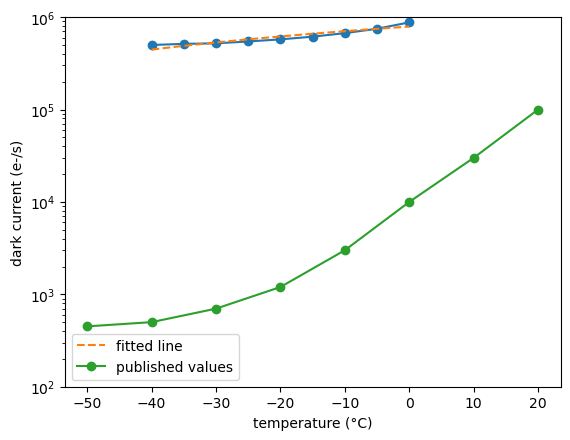

In [13]:
# plot temperature vs dark current
temp = [-40, -35, -30, -25, -20, -15, -10, -5, 0]
plt.plot(temp, dark_current, '-o')

# plot fitted line
coefs = np.polyfit(temp, dark_current, 1)
slope, intercept = coefs
dark_current_fit = [slope*t + intercept for t in temp]
plt.plot(temp, dark_current_fit, '--', label='fitted line')

# plot published dark current values
# these are for cred2 not cred2 er 
temp_pub = [-50, -40, -30, -20, -10, 0, 10, 20]
dark_current_pub = [450, 500, 700, 1200, 3000, 10000, 30000, 100000]
plt.plot(temp_pub, dark_current_pub, '-o', label='published values')

# other plot stuff
plt.ylabel('dark current (e-/s)')
plt.xlabel('temperature (°C)')
plt.yscale('log')
plt.ylim(10**2, 10**6)
plt.legend()

print('dark current increases at a rate of', slope, 'e-/s per degree Celsius')